* https://plot.ly/python/maps/
* https://data.sfgov.org/Economy-and-Community/Mobile-Food-Facility-Permit/rqzj-sfat

In [1]:
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# Importing Data

Get a sense of the data.

In [3]:
sf = pd.read_csv('data/Mobile_Food_Facility_Permit.csv')
sf.shape

(632, 24)

In [4]:
sf.head()

,locationid,Applicant,FacilityType,cnn,LocationDescription,Address,blocklot,block,lot,permit,Status,FoodItems,X,Y,Latitude,Longitude,Schedule,dayshours,NOISent,Approved,Received,PriorPermit,ExpirationDate,Location
0,1152244,San Francisco's Hometown Creamery,Truck,6109000,GEARY ST: STOCKTON ST to POWELL ST (200 - 299),281 GEARY ST,0314013,0314,013,17MFF-0001,APPROVED,Ice cream,6010423.418,2114694.802,37.787136,-122.407719,http://bsm.sfdpw.org/PermitsTracker/reports/re...,Su:11AM-11PM;Fr/Sa:6PM-11PM,NaN,10/16/2018 12:00:00 AM,2017-01-09,0,07/15/2019 12:00:00 AM,"(37.7871364910861, -122.407718509001)"
1,751253,Pipo's Grill,Truck,5688000,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,3549083,3549,083,16MFF-0010,REQUESTED,Tacos: Burritos: Hot Dogs: and Hamburgers,6007856.719,2107724.046,37.767852,-122.416105,http://bsm.sfdpw.org/PermitsTracker/reports/re...,NaN,NaN,NaN,2016-02-04,0,NaN,"(37.7678524427181, -122.416104892532)"
2,735318,Ziaurehman Amini,Push Cart,30727000,MARKET ST: DRUMM ST intersection,5 THE EMBARCADERO,0234017,0234,017,15MFF-0159,REQUESTED,NaN,6013916.720,2117244.027,37.794331,-122.395811,http://bsm.sfdpw.org/PermitsTracker/reports/re...,NaN,NaN,NaN,2015-12-31,0,03/15/2016 12:00:00 AM,"(37.7943310032468, -122.395811053023)"
3,364218,The Chai Cart,Push Cart,9543000,NEW MONTGOMERY ST: AMBROSE BIERCE ST to MISSIO...,79 NEW MONTGOMERY ST,3707014,3707,014,12MFF-0083,SUSPEND,Hot Indian Chai (Tea),6012504.312,2114926.774,37.787890,-122.400535,http://bsm.sfdpw.org/PermitsTracker/reports/re...,Mo-Su:7AM-6PM,NaN,NaN,2012-04-03,0,NaN,"(37.7878896999061, -122.400535326777)"
4,735315,Ziaurehman Amini,Push Cart,4969000,DRUMM ST: MARKET ST to CALIFORNIA ST (1 - 6),1 CALIFORNIA ST,0264004,0264,004,15MFF-0159,REQUESTED,NaN,6013552.570,2116844.500,37.793214,-122.397043,http://bsm.sfdpw.org/PermitsTracker/reports/re...,NaN,NaN,NaN,2015-12-31,0,03/15/2016 12:00:00 AM,"(37.7932137316634, -122.397043036718)"


# Cleaning Data

Each row represents a single applicant. A applicant can appear multiple times, but I belive they are for seperate locations.

In [5]:
sf['Applicant'].nunique()

113

So I want to remove all the duplicate applicants, that apply for the same location. If a applicant has mutiple locations that's fine, I just don't want applicants that apply and then reapply for the same location.

I'll solve this by removing observations with the same Applicant and Location. While there can be multiple locations per applicant and multiple applicants per location, it is unlikely that the same applicant is requesting multiple permits for the same location. In the real world, this means that a single applicant is setting up multiple food facilities on the same corner. This does not make business sense, so these instances will be excluded and assumed that it is instead applicants reapplying for the same location. 

Drops rows that have duplicate Applicant and Location columns.

In [27]:
sf.drop_duplicates(subset=['Applicant','Location'], inplace=True)

Some of the Locations are (0,0). While they do have a Address attached to them finding the latitute and longitude of each address would be too time consuming. Instead, observations with Latitutde with value of 0 will simply be dropped.

In [40]:
sf = sf.loc[sf['Latitude'] != 0]

# EDA

The vast majority of the permits are for food trucks. Only 51 permits are for food push carts.

Text(0.5, 1.0, 'Permitted facility counts')

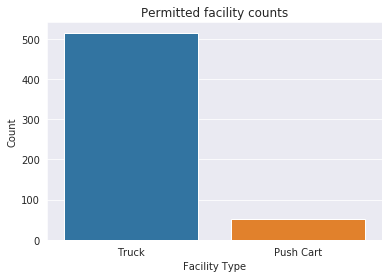

In [57]:
sns.countplot('FacilityType', data=sf)
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.title('Permitted facility counts')

Text(0.5, 1.0, 'Permitted facility counts')

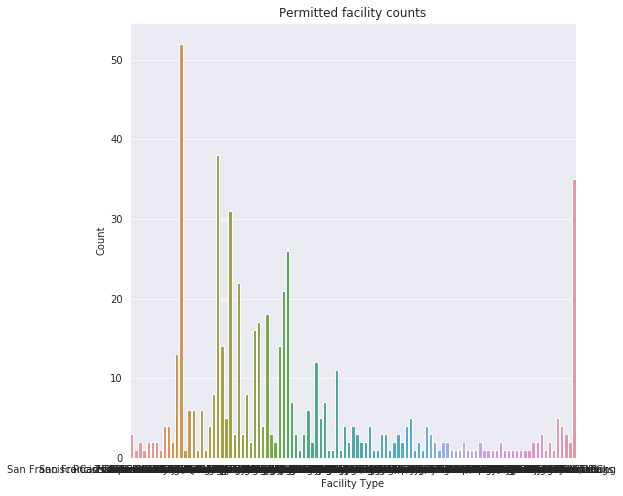

In [61]:
plt.figure(figsize=(8,8))

sns.countplot('Applicant', data=sf)

plt.xlabel('Facility Type')
plt.ylabel('Count')

plt.title('Permitted facility counts')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



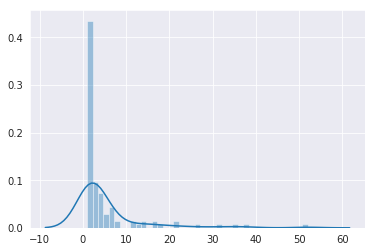

In [68]:
sf_app = sf.groupby(['Applicant']).size().reset_index()


sns.distplot(sf_app)